## Cointegration on currency paris (continuing from FX clustering)

### Cointegrated Pairs Selection

In [301]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crcy=pd.read_csv('currencies.csv') # daily prices of 29 currencies and gold and silver
cluster_all = pd.read_csv('cluster_all.csv') # clustering results from piece of "FX clustering"
df0 = cluster_all.rename(columns = {"Unnamed: 0": "Crncy"})
df0 # currencies with clusters

,Crncy,cluster_id,2020-12-30,2020-12-29,2020-12-23,2020-12-22,2020-12-21,2020-12-18,2020-12-17,2020-12-16,...,2017-01-16,2017-01-13,2017-01-12,2017-01-11,2017-01-10,2017-01-09,2017-01-06,2017-01-05,2017-01-04,2017-01-03
0,TRY,3,7.388800,7.439400,7.657500,7.643250,7.658550,7.697700,7.794710,7.830500,...,3.737780,3.763410,3.874100,3.798250,3.708490,3.639830,3.591910,3.569370,3.592300,3.541900
1,RUB,3,74.021400,73.930496,75.878098,74.551300,73.481003,73.090401,73.347900,73.278503,...,59.637001,59.432499,59.778099,60.139999,60.102501,59.564999,59.401199,60.365002,60.923000,61.228298
2,COP,3,3472.750000,3498.250000,3463.250000,3429.250000,3417.750000,3412.350098,3418.860107,3417.949951,...,2895.199951,2877.899902,2931.399902,2888.800049,2887.399902,2865.699951,2897.899902,2891.100098,2916.199951,2950.699951
3,NOK,3,8.615400,8.628140,8.726800,8.635080,8.630300,8.565710,8.666500,8.717870,...,8.508780,8.522590,8.537600,8.600120,8.527920,8.535340,8.479810,8.581940,8.640250,8.654470
4,CLP,3,714.900024,711.500000,722.200012,725.099976,724.799988,721.400024,733.700012,735.700012,...,658.799988,653.539978,654.159973,658.570007,653.070007,666.799988,649.650024,656.150024,656.409973,656.979980
5,BRL,3,5.208600,5.245900,5.156655,5.118938,5.100600,5.056900,5.083200,5.078884,...,3.186800,3.186800,3.196300,3.194500,3.195500,3.222200,3.197700,3.214100,3.263500,3.284000
6,ZAR,3,14.715900,14.622910,14.678070,14.600000,14.716430,14.629600,14.816900,14.882500,...,13.526150,13.523000,13.718200,13.726900,13.644500,13.744900,13.571500,13.597400,13.796590,13.710400
7,INR,2,73.453598,73.544899,74.269997,73.935303,73.603600,73.529800,73.616600,73.759804,...,68.157799,68.129501,68.139999,68.318001,68.097000,68.142601,67.733002,67.885498,68.269798,68.133904
8,PLN,2,3.704959,3.675042,3.693720,3.671812,3.665165,3.615330,3.635059,3.649200,...,4.124760,4.115080,4.124700,4.139990,4.135110,4.135660,4.112820,4.159860,4.208850,4.215710
9,CNY,2,6.530000,6.535600,6.542200,6.548200,6.536000,6.532100,6.531300,6.538300,...,6.898800,6.894900,6.936100,6.921200,6.936700,6.917500,6.887900,6.925100,6.959800,6.944000


29 currencies and AU and AG are grouped into 4 clusters, details as follows.

- Group 0: EM currencies and several DM currencies - GBP, EUR, SEK, NZD, though a bit counter-intuitive, probably due to
inadequate data and inefficient features

- Group 1: currencies highly correlated with commodities

- Group 2: government-regulated EM currencies, except JPY

- Group 3: currencies of countries with continuesly high inflation, except NOK

In [302]:
df0.set_index('cluster_id')
df1 = df0.T.iloc[2:,:][::-1]
cluster_dic = df0.groupby('cluster_id')['Crncy'].apply(list).to_dict()
df0T = df0.T[::-1]
df0T.columns = df0T.iloc[980,:]
df0T = df0T.drop(index = ['cluster_id','Crncy'])
cluster_dic

{0: ['HUF', 'TWD', 'KRW', 'MYR', 'IDR', 'NZD', 'THB', 'GBP', 'EUR', 'SEK'],
 1: ['CAD', 'AUD', 'AU$', 'MXN', 'AG$'],
 2: ['INR', 'PLN', 'CNY', 'ILS', 'RON', 'CHF', 'JPY', 'PHP', 'SGD'],
 3: ['TRY', 'RUB', 'COP', 'NOK', 'CLP', 'BRL', 'ZAR']}

A function to select cointegrated pairs within each cluster

In [303]:
def coint(t0,t1,cluster_dic, df, sig):
    pair=[]
    n = len(cluster_dic)
    keys = cluster_dic.copy()
    p=[]
    #pair_dic= {}
    df_pair=pd.DataFrame()
    for i in range(n):
        for g in range(len(keys[i])-1):
            c1 = df.loc[t0:t1,keys[i][g]]
            c2 = df.loc[t0:t1,keys[i][g+1]]

            res = sm.tsa.stattools.coint(c1,c2)
            if res[1] < sig:
                pair.append((c1.name,c2.name))
                p.append(res[1])

                dict(zip(pair,p))
    return dict(zip(pair,p))

In [304]:
t0 = '2017-01-03'
t1 = '2019-12-31'
t2 = '2018-07-31'
coint(t0,t1,cluster_dic,df0T,0.05)

{('GBP', 'EUR'): 0.04842363712058171,
 ('MXN', 'AG$'): 0.0027289170213296117,
 ('PLN', 'CNY'): 0.042172649523693984,
 ('JPY', 'PHP'): 0.020071871144894567,
 ('NOK', 'CLP'): 0.030920110136495215}

Window of train data is set as from 2017 to 2019, time period before covid pandemic, since changes of economic fundamentals
bring irregularity to markets due to QE.

Sets of cointegrated currency pairs of each cluster are selected as follow, with significance of 5%.

- Sterling, Euro;
- Mexcian Peso, Silver;
- Polosh Zloty, Chinese Yuan;
- Japanese Yen, Phillippine Peso;
- Norwegian Krone, Chilean Peso

The cointegration relationship between GBP and EUR is intuitive, whereas the intuition behind the rest pairs are difficult
to explain.

In [305]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
df1 = df0T
crncy1 = 'GBP'
crncy2 = 'EUR'
c01 = df1.loc[t0:t1,crncy1].diff().dropna()
c02 = df1.loc[t0:t1,crncy2].diff().dropna()
c1 = np.asarray(c01)
c2 = np.asarray(c02)
#df=pd.DataFrame([c1,c2])
#df.info()

Function to generate cointegration test and results

In [306]:
def cointegration(y0,y1):
    #print("Results of cointergration:")
    y0 = c1
    y1 = c2
    #res = sm.tsa.stattools.coint(c1,c2, trend='ct')
    dftest = sm.tsa.stattools.coint(y0,y1, trend='ct')
    dfoutput = pd.Series(
        dftest[:2],
        index=[
            "Test Statistic on residuals",
            "P-value",
        ],
    )
    a = ["1%", "5%", "10%"]
    cri = dict(zip(a, dftest[2]))
    for key, value in cri.items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
cointegration(c1,c2)

Test Statistic on residuals   -1.740497e+01
P-value                        3.625834e-34
Critical Value (1%)           -4.348953e+00
Critical Value (5%)           -3.793693e+00
Critical Value (10%)          -3.506078e+00
dtype: float64


In [312]:
c1 = c1.astype('float64')
c2 = c2.astype('float64')
model = sm.OLS(c1, c2, hasconst=True)
results = model.fit()
predict = results.predict(c2) # find the residual and test if the residuals are stationary (ADF test)
error = c1 - predict

idx = c01.index

In [308]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

adf_test(error)

Results of Dickey-Fuller Test:
Test Statistic                -1.738114e+01
p-value                        5.072111e-30
#Lags Used                     2.000000e+00
Number of Observations Used    7.240000e+02
Critical Value (1%)           -3.439414e+00
Critical Value (5%)           -2.865540e+00
Critical Value (10%)          -2.568900e+00
dtype: float64


We can believe that the error of cointegration of GBP and EUR is stationary by visualizing the error of cointegration between GBP and EUR,

<AxesSubplot:>

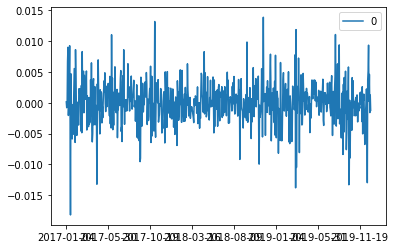

In [313]:
pd.DataFrame(error, index = idx).plot()

### Trading Strategy
sample experiment on pair GBP and EUR

Create the spread function (price pair's relation)

Function of spread is defined as blow:

$Spread = a - nb$

where the 'a' and 'b' are daily prices of currency A and currency B respectively
and the 'n' is hedge ratio.

In [314]:
data = pd.DataFrame([c01,c02]).T
# Drop 0 and NA
data = data[~(data==0)].dropna()
dates = data.index
#dates
stocks = ['GBP','EUR']
returns = data.pct_change().dropna()

,GBP,EUR
2017-01-05,-3.223123,-3.010868
2017-01-06,0.197040,0.274327
2017-01-09,-2.677008,-1.703076
2017-01-10,-0.457405,-1.767722
2017-01-11,-1.010243,-1.636540
...,...,...
2019-12-19,-0.764772,-3.465471
2019-12-20,1.019672,-1.283204
2019-12-23,-0.826825,-5.617485
2019-12-27,-0.732371,-1.462572


In [315]:
import scipy.optimize as spop
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
from scipy import stats

fee = 0.001
window = 21 # total number of business days in one year
t_threshold = 1.96
#initialising arrays
gross_returns = np.array([])
net_returns = np.array([])
t_s = np.array([])
stock1 = stocks[0] #GBP
stock2 = stocks[1] #EUR


# model building via moving window with length of 21 (monthly) through the sample
for t in range(window, len(data)-1):
    #defining the unit root function: stock2 = a + b*stock1
    def unit_root(b):
        a = np.average(data[stock2][t-window:t] - b*data[stock1][t-window:t])
        fair_value = a + b*data[stock1][t-window:t]
        diff = np.array(fair_value - data[stock2][t-window:t])
        diff_diff = diff[1:] - diff[:-1]
        reg = sm.OLS(diff_diff, diff[:-1])
        res = reg.fit()
        return res.params[0]/res.bse[0]
    #optimising the cointegration equation parameters
    res1 = spop.minimize(unit_root, data[stock2][t]/data[stock1][t], method='Nelder-Mead')
    t_opt = res1.fun
    b_opt = float(res1.x)
    a_opt = np.average(data[stock2][t-window:t] - b_opt*data[stock1][t-window:t])

    #simulating trading
    fair_value = a_opt + b_opt*data[stock1][t]
    if t == window:
        old_signal = 0
    if abs(t_opt) < t_threshold:
        signal = 0
        gross_return = 0
    else:
        signal = np.sign(fair_value - data[stock2][t])
        gross_return = signal*returns[stock2][t] - signal*returns[stock1][t]
    fees = fee*abs(signal - old_signal)
    net_return = gross_return - fees
    gross_returns = np.append(gross_returns, gross_return)
    #gross_returns = gross_returns.appedn(gross_return)
    #net_returns = net_returns.append(net_return)
    net_returns = np.append(net_returns, net_return)
    t_s = np.append(t_s, t_opt)

    #interface: reporting daily positions and realised returns
    print('day '+str(data.index[t]))
    print('')
    if signal == 0:
        print('no trading')
    elif  signal == 1:
        print('long position on '+stock2+' and short position on '+stock1)
    else:
        print('long position on '+stock1+' and short position on '+stock2)
    print('gross daily return: '+str(round(gross_return*100,2))+'%')
    print('net daily return: '+str(round(net_return*100,2))+'%')
    print('cumulative net return so far: '+str(round(np.prod(1+net_returns)*100-100,2))+'%')
    print('')
    old_signal = signal

day 2017-02-02

long position on GBP and short position on EUR
gross daily return: -213.88%
net daily return: -213.98%
cumulative net return so far: -213.98%

day 2017-02-03

long position on GBP and short position on EUR
gross daily return: 399.14%
net daily return: 399.14%
cumulative net return so far: -668.9%

day 2017-02-06

long position on EUR and short position on GBP
gross daily return: -231.97%
net daily return: -232.17%
cumulative net return so far: 651.92%

day 2017-02-07

long position on EUR and short position on GBP
gross daily return: 341.09%
net daily return: 341.09%
cumulative net return so far: 3216.65%

day 2017-02-08

long position on GBP and short position on EUR
gross daily return: 135.23%
net daily return: 135.03%
cumulative net return so far: 7695.24%

day 2017-02-09

long position on EUR and short position on GBP
gross daily return: -143.81%
net daily return: -144.01%
cumulative net return so far: -3530.84%

day 2017-02-10

long position on EUR and short positi

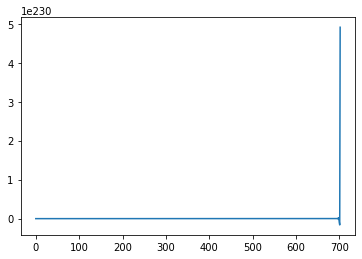

In [316]:
plt.plot(np.cumprod(1+gross_returns))

In [ ]:
plt.plot(np.cumprod(1+net_returns))
